In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from itertools import combinations

folder = "../database_cleaned"

In [118]:
jeux_clean = pd.read_csv(f'{folder}/jeux_clean.csv')
fig = plt.figure(figsize=(10, 5))
jeux_clean["Type"] = jeux_clean["Type"].str.split('|')
jeux_expand = jeux_clean.explode("Type")

<Figure size 1000x500 with 0 Axes>

In [119]:
# Categories visualization
def plot_hist_count(data, ax, x_labels_vis = False, y_label=None, title=None, rotation=90, sorted=False):
    """Plot histogram (bars). Data : doit être formé de 2 colonnes : index et values (e.g. à l'aide de group by)"""

    
    ax.clear()
    
    if sorted:
        data.sort_index(inplace=True)

    x_coords = np.arange(stop = data.shape[0])

    bars = ax.bar(x_coords, height=data.values.flatten())

    nan_check = data.index.isna()

    if nan_check.any(): # change NaN bar color to red
            x_labels = data.index
            bars[np.where(nan_check)[0][0]].set_color('r')
            
    if x_labels_vis:
        ax.tick_params(axis='x', labelrotation=rotation)
        ax.set_xticks(x_coords)  # Set the tick positions
        ax.set_xticklabels(x_labels)
        ax.xaxis.set_major_locator(plt.FixedLocator(x_coords))
    else:
        ax.xaxis.set_visible(False)

    if title:
        ax.set_title(title)

    if y_label:
        ax.set_ylabel(y_label)
    return ax


def heatmap_categories(matrix_df, ax, cbarlabel):
    """Plot heatmap (2D = 2 categories) to see most common categories combinations"""
    
    ax.clear()
    heatmap = ax.imshow(matrix_df.to_numpy())
    cbar = ax.figure.colorbar(heatmap, ax=ax)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    labels = matrix_df.columns
    ax.set_xticks(range(len(labels)))  # Set the tick positions
    ax.set_xticklabels(labels)

    ax.set_yticks(range(len(labels)))  # Set the tick positions
    ax.set_yticklabels(labels)
    
    ax.tick_params(axis='x', labelrotation=90)

    ax.xaxis.set_major_locator(plt.FixedLocator(np.arange(len(labels))))
    ax.yaxis.set_major_locator(plt.FixedLocator(np.arange(len(labels))))


In [120]:
categories_data = jeux_expand[["Game id", "Type"]].groupby("Type", dropna=False, as_index=True).count()
categories_popular = categories_data.sort_values("Game id", ascending=False)


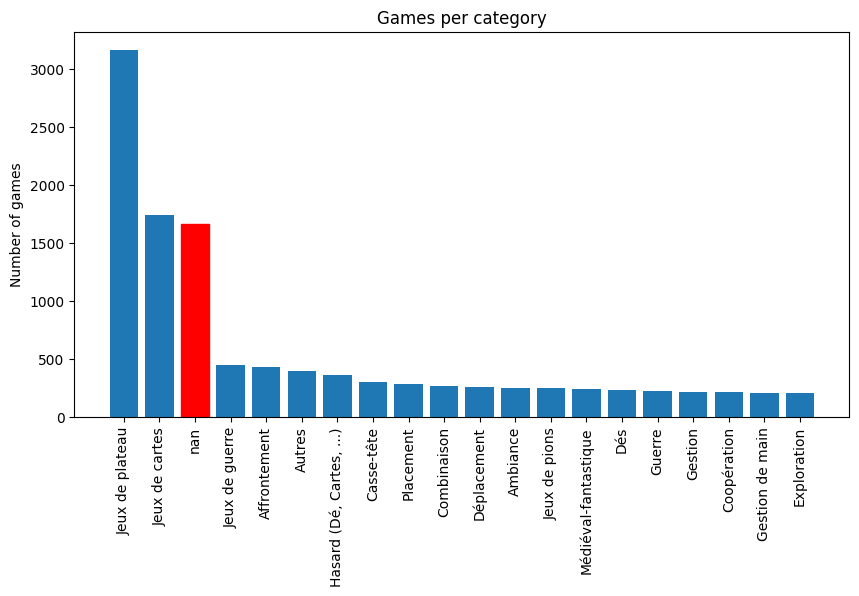

In [ ]:
fig.clear()
ax = plot_hist_count(data=categories_popular.head(20), ax=fig.add_subplot(111),
                       x_labels_vis=True, y_label="Number of games", title="Games per category")
fig

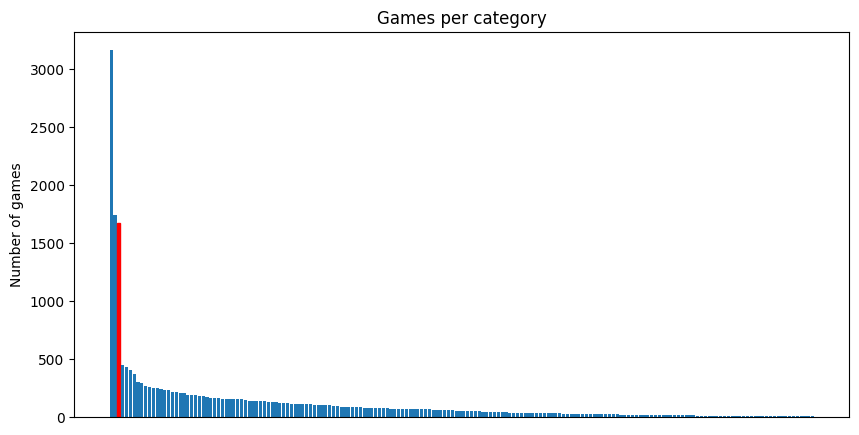

In [ ]:
# Categories histogram (all 183 categories)
fig.clear()
ax = plot_hist_count(data=categories_popular["Game id"], ax=fig.add_subplot(111),
                       x_labels_vis=False, y_label="Number of games", title="Games per category")
fig


In [135]:
# Create matrix (= dataframe) for heatmap (20 most common categories)
top_categories = categories_popular[~categories_popular.index.isna()].head(20).index # top N categories
pair_categories = Counter([pair for cats in jeux_clean["Type"][~jeux_clean["Type"].isna()] for pair in combinations(sorted(cats), 2)])

nb_categories = top_categories.size
heatmap_matrix = pd.DataFrame(data=0, index=top_categories, columns=top_categories)

for (cat1, cat2), count in pair_categories.items():
    if cat1 in heatmap_matrix and cat2 in heatmap_matrix.columns:
        heatmap_matrix.loc[cat1, cat2] += count
    if cat2 in heatmap_matrix and cat1 in heatmap_matrix.columns:
        heatmap_matrix.loc[cat2, cat1] += count
heatmap_matrix

Type,Jeux de plateau,Jeux de cartes,Jeux de guerre,Affrontement,Autres,"Hasard (Dé, Cartes, ...)",Casse-tête,Placement,Combinaison,Déplacement,Ambiance,Jeux de pions,Médiéval-fantastique,Dés,Guerre,Gestion,Coopération,Gestion de main,Exploration,Jeux de figurines
Type,,,,,,,,,,,,,,,,,,,,
Jeux de plateau,0,38,15,68,6,68,3,73,31,70,20,10,40,43,30,52,32,17,41,15
Jeux de cartes,38,0,2,47,8,34,0,16,36,9,29,3,41,12,16,5,21,36,10,4
Jeux de guerre,15,2,0,46,0,17,0,3,0,8,0,0,5,6,63,1,2,5,0,7
Affrontement,68,47,46,0,4,104,0,44,42,71,41,1,75,69,146,27,33,61,34,19
Autres,6,8,0,4,0,4,1,2,2,0,7,1,1,2,1,0,3,0,1,0
"Hasard (Dé, Cartes, ...)",68,34,17,104,4,0,0,38,50,63,50,1,58,69,50,26,47,42,54,6
Casse-tête,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Placement,73,16,3,44,2,38,0,0,39,42,9,4,23,33,26,47,6,28,26,2
Combinaison,31,36,0,42,2,50,0,39,0,13,18,1,27,39,13,52,18,51,20,0


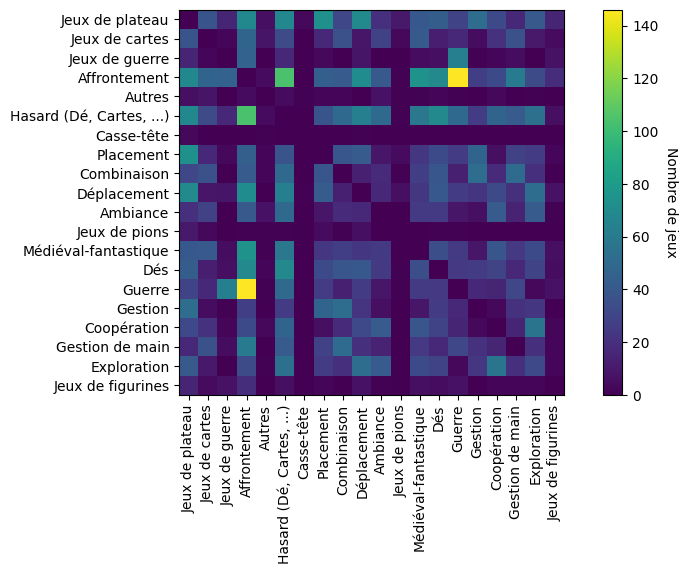

In [136]:
fig.clear()
ax = heatmap_categories(heatmap_matrix, fig.add_subplot(111), "Nombre de jeux")
fig

In [13]:
fig.clear()